In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn.cluster import KMeans

In [26]:
img_path = "/Users/sanjayravindran/Documents/SoccerCV Project/basketballcv/output_videos/img_2.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


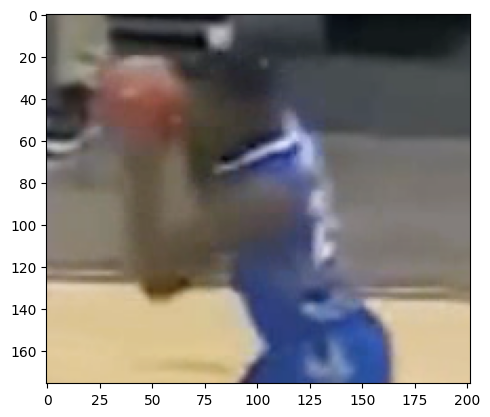

In [27]:
plt.imshow(image)
plt.show()

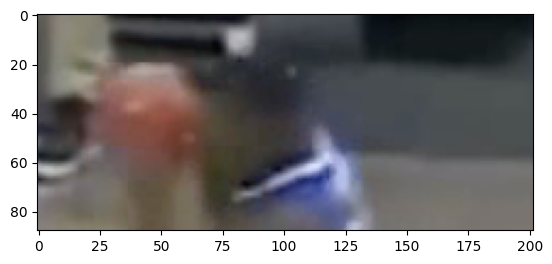

In [28]:

top_half_img = image[0:int(image.shape[0] / 2), :]

plt.imshow(top_half_img)

In [31]:

image_2d = image.reshape(-1,3)

kmeans = KMeans(n_clusters=2, init = "k-means++", random_state=0)
kmeans.fit(image_2d)


labels = kmeans.labels_
kmeans.cluster_centers_[0]








array([88.60236572, 86.36511453, 91.00525319])

In [32]:
image_2d.shape

(35552, 3)

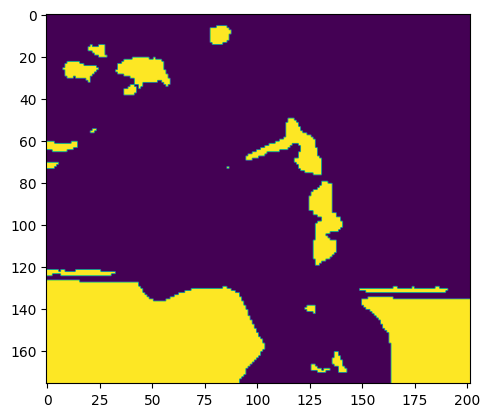

In [33]:
# Reshape labels to the original image shape
segmented_image = labels.reshape(image.shape[0], image.shape[1])



plt.imshow(segmented_image)
plt.show()


In [34]:
kmeans.cluster_centers_

array([[ 88.60236572,  86.36511453,  91.00525319],
       [205.49768794, 187.62729555, 155.80023781]])

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Step 2: Convert to LAB color space for better color differentiation
# image_lab = cv2.cvtColor(top_half_img, cv2.COLOR_BGR2LAB)
# pixels = image_lab.reshape(-1, 3)

# Step 3: Apply K-means clustering
k = 2  # Increase the number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Step 4: Identify the dominant color (jersey color)
cluster_centers = cluster_centers.astype(int)
unique, counts = np.unique(labels, return_counts=True)
dominant_color = cluster_centers[np.argmax(counts)]

print(f"Dominant color: {dominant_color}")

# Step 5: Reshape labels to the original image shape and convert to uint8
segmented_image = labels.reshape(top_half_img.shape[:2]).astype(np.uint8)

#Apply morphological operations to reduce noise and smooth the segmentation
kernel = np.ones((5, 5), np.uint8)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)
segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, kernel)

# Detect and filter out small contours
# contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# for contour in contours:
#     if cv2.contourArea(contour) < 500:  # Filter out small contours
#         cv2.drawContours(segmented_image, [contour], -1, 0, -1)

# Create an image with the dominant color for visualization
dominant_image = np.full(image.shape, dominant_color, dtype=np.uint8)

# Convert back to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
dominant_image_rgb = cv2.cvtColor(dominant_image, cv2.COLOR_LAB2RGB)


plt.subplot(1, 3, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)  # Use a colormap to visualize clusters
plt.axis('off')


plt.show()


NameError: name 'image_2d' is not defined

In [134]:
corner_cluster = [segmented_image[0,0], segmented_image[0,-1], segmented_image[-1,0], segmented_image[-1,-1]]

non_player_cluster = max(set(corner_cluster), key = corner_cluster.count)
print(corner_cluster)

[0, 0, 1, 1]


In [135]:
player_cluster = 1- non_player_cluster
print(player_cluster)

1


In [136]:
kmeans.cluster_centers_[1]

array([205.49768794, 187.62729555, 155.80023781])

In [ ]:
######

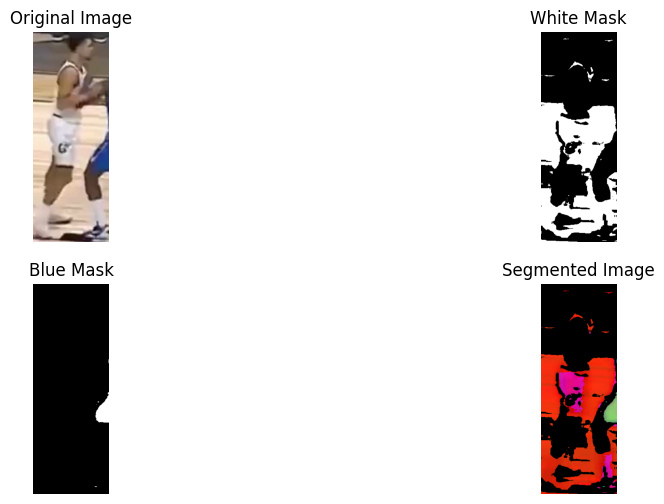

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read and convert the image to HSV
image = cv2.imread('/Users/sanjayravindran/Documents/SoccerCV Project/basketballcv/output_videos/cropped_img.jpg')
if image is None:
    raise ValueError("Image not found or unable to read.")
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)




# Step 2: Define HSV color ranges for white and blue
lower_white = np.array([0, 0, 200], dtype=np.uint8)
upper_white = np.array([180, 55, 255], dtype=np.uint8)


lower_brown = np.array([10, 20, 100], dtype=np.uint8)
upper_brown = np.array([30, 255, 200], dtype=np.uint8)



lower_blue = np.array([100, 150, 0], dtype=np.uint8)
upper_blue = np.array([140, 255, 255], dtype=np.uint8)

# Step 3: Create masks for white and blue colors
mask_white = cv2.inRange(image_hsv, lower_white, upper_white)
mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)

mask_brown = cv2.inRange(image_hsv, lower_brown, upper_brown)

mask_white = cv2.bitwise_and(mask_white, cv2.bitwise_not(mask_brown))

# Step 4: Combine the masks and apply to the image
combined_mask = cv2.bitwise_or(mask_white, mask_blue)
segmented_image = cv2.bitwise_and(image_hsv, image_hsv, mask=combined_mask)

# Visualization
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('White Mask')
plt.imshow(mask_white, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Blue Mask')
plt.imshow(mask_blue, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Segmented Image')
plt.imshow(segmented_image_rgb)
plt.axis('off')

plt.show()


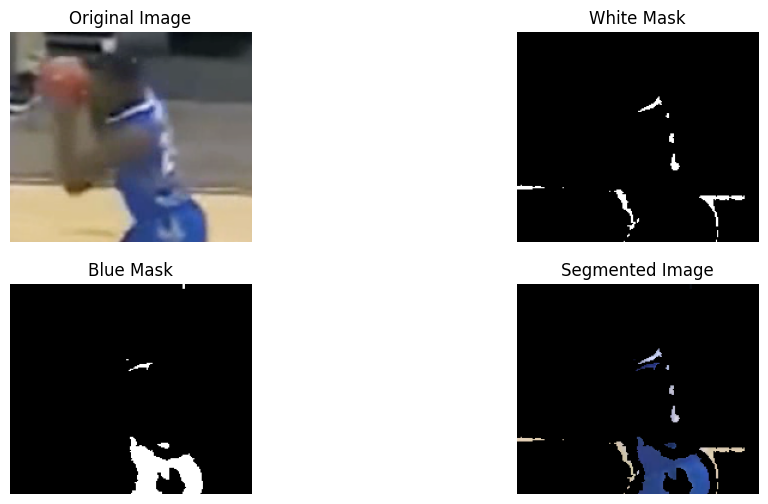

White pixel count: 566
Blue pixel count: 1577
The player is classified as part of the Blue team.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read and convert the image to HSV
image = cv2.imread('/Users/sanjayravindran/Documents/SoccerCV Project/basketballcv/output_videos/img_2.png')
if image is None:
    raise ValueError("Image not found or unable to read.")
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 2: Define HSV color ranges for white and blue
lower_white = np.array([0, 0, 200], dtype=np.uint8)
upper_white = np.array([180, 55, 255], dtype=np.uint8)

lower_brown = np.array([10, 20, 100], dtype=np.uint8)
upper_brown = np.array([30, 255, 200], dtype=np.uint8)

lower_blue = np.array([100, 150, 0], dtype=np.uint8)
upper_blue = np.array([140, 255, 255], dtype=np.uint8)

# Step 3: Create masks for white and blue colors
mask_white = cv2.inRange(image_hsv, lower_white, upper_white)
mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)
mask_brown = cv2.inRange(image_hsv, lower_brown, upper_brown)

# Exclude brown areas from the white mask
mask_white = cv2.bitwise_and(mask_white, cv2.bitwise_not(mask_brown))

# Step 4: Combine the masks and apply to the original image
combined_mask = cv2.bitwise_or(mask_white, mask_blue)
segmented_image = cv2.bitwise_and(image, image, mask=combined_mask)

# Visualization
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('White Mask')
plt.imshow(mask_white, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Blue Mask')
plt.imshow(mask_blue, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Segmented Image')
plt.imshow(segmented_image_rgb)
plt.axis('off')

plt.show()

# Count the number of white and blue pixels
white_pixel_count = np.count_nonzero(mask_white)
blue_pixel_count = np.count_nonzero(mask_blue)

print(f"White pixel count: {white_pixel_count}")
print(f"Blue pixel count: {blue_pixel_count}")

# Classify the player based on the dominant color
if white_pixel_count > blue_pixel_count:
    team = "White"
else:
    team = "Blue"

print(f"The player is classified as part of the {team} team.")


Dominant colors: [[ 17  58 145]
 [113  62  97]]
Color 1 pixel count: 8994
Color 2 pixel count: 4554
The player is classified as part of the Team with Color 1


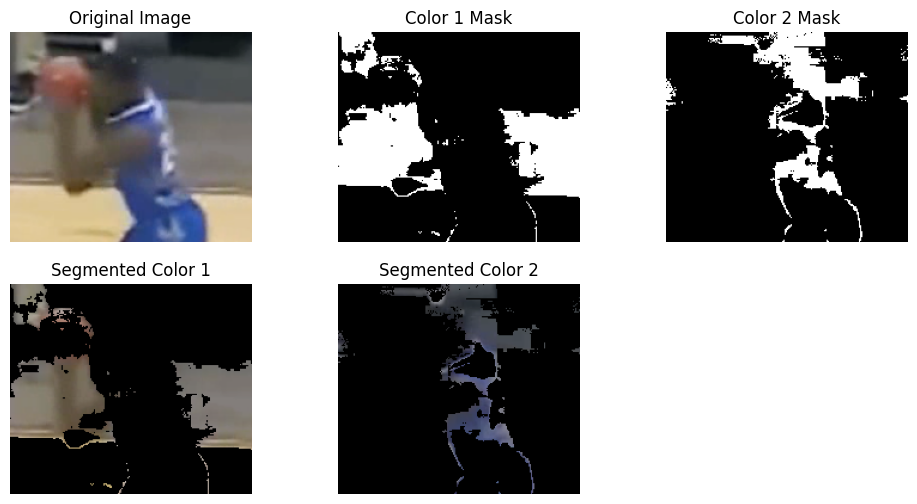

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Read and convert the image to HSV
image = cv2.imread('/Users/sanjayravindran/Documents/SoccerCV Project/basketballcv/output_videos/img_2.png')
if image is None:
    raise ValueError("Image not found or unable to read.")
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 2: Use K-means clustering to find the two dominant colors
# Reshape the image to be a list of pixels
pixels = image_hsv.reshape(-1, 3)

# Use K-means clustering to find the two dominant colors
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(pixels)

# The cluster centers are our dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)
print(f"Dominant colors: {dominant_colors}")

# Step 3: Define color ranges for the two dominant colors
def create_hsv_range(center_color, delta_h=10, delta_s=50, delta_v=50):
    lower_bound = np.array([
        max(center_color[0] - delta_h, 0),
        max(center_color[1] - delta_s, 0),
        max(center_color[2] - delta_v, 0)
    ], dtype=np.uint8)
    upper_bound = np.array([
        min(center_color[0] + delta_h, 179),
        min(center_color[1] + delta_s, 255),
        min(center_color[2] + delta_v, 255)
    ], dtype=np.uint8)
    return lower_bound, upper_bound



lower_brown = np.array([10, 20, 100], dtype=np.uint8)
upper_brown = np.array([30, 255, 200], dtype=np.uint8)

# Define HSV ranges for the two dominant colors
lower_color1, upper_color1 = create_hsv_range(dominant_colors[0])
lower_color2, upper_color2 = create_hsv_range(dominant_colors[1])

# Step 4: Create masks for the two colors
mask_color1 = cv2.inRange(image_hsv, lower_color1, upper_color1)
mask_color2 = cv2.inRange(image_hsv, lower_color2, upper_color2)



# Step 5: Segment the image and classify based on the dominant color
# Apply the masks to the original image
segmented_color1 = cv2.bitwise_and(image, image, mask=mask_color1)
segmented_color2 = cv2.bitwise_and(image, image, mask=mask_color2)

# Count the number of pixels for each color
color1_pixel_count = np.count_nonzero(mask_color1)
color2_pixel_count = np.count_nonzero(mask_color2)

print(f"Color 1 pixel count: {color1_pixel_count}")
print(f"Color 2 pixel count: {color2_pixel_count}")

# Classify the player based on the dominant color
if color1_pixel_count > color2_pixel_count:
    team = "Team with Color 1"
else:
    team = "Team with Color 2"

print(f"The player is classified as part of the {team}")

# Visualization
segmented_color1_rgb = cv2.cvtColor(segmented_color1, cv2.COLOR_BGR2RGB)
segmented_color2_rgb = cv2.cvtColor(segmented_color2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Color 1 Mask')
plt.imshow(mask_color1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Color 2 Mask')
plt.imshow(mask_color2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Segmented Color 1')
plt.imshow(segmented_color1_rgb)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Segmented Color 2')
plt.imshow(segmented_color2_rgb)
plt.axis('off')

plt.show()


Dominant colors (HSV): [[ 28  42 217]
 [ 36  81 106]]
Color 1 pixel count: 1790
Color 2 pixel count: 0
The player is classified as part of the Team with Color 1


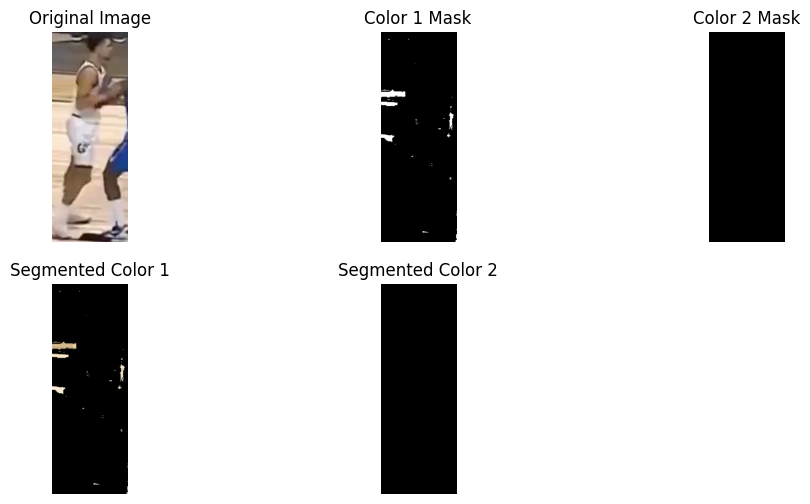

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class TeamAssigner:
    def __init__(self, delta_h=10, delta_s=50, delta_v=50, n_init=10):
        self.delta_h = delta_h
        self.delta_s = delta_s
        self.delta_v = delta_v
        self.n_init = n_init

    def read_and_convert_image(self, image_path):
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Image not found or unable to read.")
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        return image, image_hsv

    def get_clustering_model(self, image_hsv):
        pixels = image_hsv.reshape(-1, 3)
        kmeans = KMeans(n_clusters=2, n_init=self.n_init)
        kmeans.fit(pixels)
        return kmeans

    def create_hsv_range(self, center_color):
        lower_bound = np.array([
            max(center_color[0] - self.delta_h, 0),
            max(center_color[1] - self.delta_s, 0),
            max(center_color[2] - self.delta_v, 0)
        ], dtype=np.uint8)
        upper_bound = np.array([
            min(center_color[0] + self.delta_h, 179),
            min(center_color[1] + self.delta_s, 255),
            min(center_color[2] + self.delta_v, 255)
        ], dtype=np.uint8)
        return lower_bound, upper_bound

    def define_color_ranges(self, dominant_colors):
        lower_color1, upper_color1 = self.create_hsv_range(dominant_colors[0])
        lower_color2, upper_color2 = self.create_hsv_range(dominant_colors[1])
        return (lower_color1, upper_color1), (lower_color2, upper_color2)

    def create_masks(self, image_hsv, color_ranges):
        (lower_color1, upper_color1), (lower_color2, upper_color2) = color_ranges
        mask_color1 = cv2.inRange(image_hsv, lower_color1, upper_color1)
        mask_color2 = cv2.inRange(image_hsv, lower_color2, upper_color2)
        return mask_color1, mask_color2

    def segment_image(self, image, masks):
        mask_color1, mask_color2 = masks
        segmented_color1 = cv2.bitwise_and(image, image, mask=mask_color1)
        segmented_color2 = cv2.bitwise_and(image, image, mask=mask_color2)
        return segmented_color1, segmented_color2

    def classify_player(self, masks):
        mask_color1, mask_color2 = masks
        color1_pixel_count = np.count_nonzero(mask_color1)
        color2_pixel_count = np.count_nonzero(mask_color2)
        print(f"Color 1 pixel count: {color1_pixel_count}")
        print(f"Color 2 pixel count: {color2_pixel_count}")

        if color1_pixel_count > color2_pixel_count:
            team = "Team with Color 1"
        else:
            team = "Team with Color 2"
        return team

    def visualize(self, image, masks, segmented_images):
        mask_color1, mask_color2 = masks
        segmented_color1, segmented_color2 = segmented_images
        segmented_color1_rgb = cv2.cvtColor(segmented_color1, cv2.COLOR_BGR2RGB)
        segmented_color2_rgb = cv2.cvtColor(segmented_color2, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.title('Color 1 Mask')
        plt.imshow(mask_color1, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.title('Color 2 Mask')
        plt.imshow(mask_color2, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.title('Segmented Color 1')
        plt.imshow(segmented_color1_rgb)
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.title('Segmented Color 2')
        plt.imshow(segmented_color2_rgb)
        plt.axis('off')

        plt.show()

    def assign_teams(self, image_path):
        image, image_hsv = self.read_and_convert_image(image_path)
        kmeans = self.get_clustering_model(image_hsv)
        dominant_colors_hsv = kmeans.cluster_centers_.astype(int)
        print(f"Dominant colors (HSV): {dominant_colors_hsv}")

        color_ranges = self.define_color_ranges(dominant_colors_hsv)
        masks = self.create_masks(image_hsv, color_ranges)
        segmented_images = self.segment_image(image, masks)
        team = self.classify_player(masks)
        print(f"The player is classified as part of the {team}")

        self.visualize(image, masks, segmented_images)

# Example usage:
team_assigner = TeamAssigner()
team_assigner.assign_teams('/Users/sanjayravindran/Documents/SoccerCV Project/basketballcv/output_videos/cropped_img.jpg')


Dominant colors (HSV): [[ 17  58 145]
 [113  62  97]]
Color 1 pixel count: 2861
Color 2 pixel count: 4554
The player is classified as part of the Team with Color 2


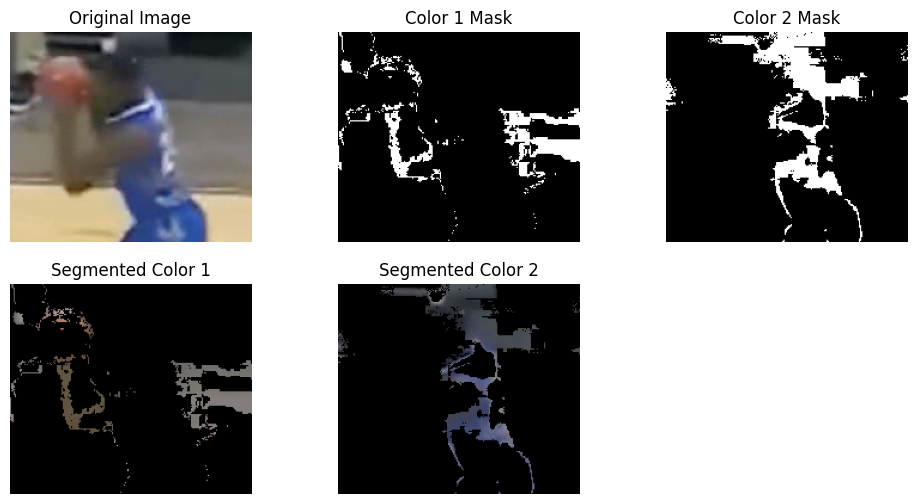

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class TeamAssigner:
    def __init__(self, delta_h=10, delta_s=50, delta_v=50, n_init=10):
        self.delta_h = delta_h
        self.delta_s = delta_s
        self.delta_v = delta_v
        self.n_init = n_init

    def read_and_convert_image(self, image_path):
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Image not found or unable to read.")
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        return image, image_hsv

    def get_clustering_model(self, image_hsv):
        pixels = image_hsv.reshape(-1, 3)
        kmeans = KMeans(n_clusters=2, n_init=self.n_init)
        kmeans.fit(pixels)
        return kmeans

    def create_hsv_range(self, center_color):
        lower_bound = np.array([
            max(center_color[0] - self.delta_h, 0),
            max(center_color[1] - self.delta_s, 0),
            max(center_color[2] - self.delta_v, 0)
        ], dtype=np.uint8)
        upper_bound = np.array([
            min(center_color[0] + self.delta_h, 179),
            min(center_color[1] + self.delta_s, 255),
            min(center_color[2] + self.delta_v, 255)
        ], dtype=np.uint8)
        return lower_bound, upper_bound

    def define_color_ranges(self, dominant_colors):
        lower_color1, upper_color1 = self.create_hsv_range(dominant_colors[0])
        lower_color2, upper_color2 = self.create_hsv_range(dominant_colors[1])
        return (lower_color1, upper_color1), (lower_color2, upper_color2)

    def create_masks(self, image_hsv, color_ranges):
        (lower_color1, upper_color1), (lower_color2, upper_color2) = color_ranges
        mask_color1 = cv2.inRange(image_hsv, lower_color1, upper_color1)
        mask_color2 = cv2.inRange(image_hsv, lower_color2, upper_color2)
        
        # Define brown color range and create mask
        lower_brown = np.array([10, 20, 100], dtype=np.uint8)
        upper_brown = np.array([30, 255, 200], dtype=np.uint8)
        mask_brown = cv2.inRange(image_hsv, lower_brown, upper_brown)
        
        # Exclude brown areas from the masks
        mask_color1 = cv2.bitwise_and(mask_color1, cv2.bitwise_not(mask_brown))
        mask_color2 = cv2.bitwise_and(mask_color2, cv2.bitwise_not(mask_brown))

        return mask_color1, mask_color2

    def segment_image(self, image, masks):
        mask_color1, mask_color2 = masks
        segmented_color1 = cv2.bitwise_and(image, image, mask=mask_color1)
        segmented_color2 = cv2.bitwise_and(image, image, mask=mask_color2)
        return segmented_color1, segmented_color2

    def classify_player(self, masks):
        mask_color1, mask_color2 = masks
        color1_pixel_count = np.count_nonzero(mask_color1)
        color2_pixel_count = np.count_nonzero(mask_color2)
        print(f"Color 1 pixel count: {color1_pixel_count}")
        print(f"Color 2 pixel count: {color2_pixel_count}")

        if color1_pixel_count > color2_pixel_count:
            team = "Team with Color 1"
        else:
            team = "Team with Color 2"
        return team

    def visualize(self, image, masks, segmented_images):
        mask_color1, mask_color2 = masks
        segmented_color1, segmented_color2 = segmented_images
        segmented_color1_rgb = cv2.cvtColor(segmented_color1, cv2.COLOR_BGR2RGB)
        segmented_color2_rgb = cv2.cvtColor(segmented_color2, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 3, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(2, 3, 2)
        plt.title('Color 1 Mask')
        plt.imshow(mask_color1, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 3, 3)
        plt.title('Color 2 Mask')
        plt.imshow(mask_color2, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 3, 4)
        plt.title('Segmented Color 1')
        plt.imshow(segmented_color1_rgb)
        plt.axis('off')

        plt.subplot(2, 3, 5)
        plt.title('Segmented Color 2')
        plt.imshow(segmented_color2_rgb)
        plt.axis('off')

        plt.show()

    def assign_teams(self, image_path):
        image, image_hsv = self.read_and_convert_image(image_path)
        kmeans = self.get_clustering_model(image_hsv)
        dominant_colors_hsv = kmeans.cluster_centers_.astype(int)
        print(f"Dominant colors (HSV): {dominant_colors_hsv}")

        color_ranges = self.define_color_ranges(dominant_colors_hsv)
        masks = self.create_masks(image_hsv, color_ranges)
        segmented_images = self.segment_image(image, masks)
        team = self.classify_player(masks)
        print(f"The player is classified as part of the {team}")

        self.visualize(image, masks, segmented_images)

# Example usage:
team_assigner = TeamAssigner()
team_assigner.assign_teams('/Users/sanjayravindran/Documents/SoccerCV Project/basketballcv/output_videos/img_2.png')


In [27]:
from sklearn.cluster import KMeans

class TeamAssigner:
    def __init__(self):
        self.team_colors = {}
        self.player_team_dict = {}
    
    def get_clustering_model(self,image):
        # Reshape the image to 2D array
        image_2d = image.reshape(-1,3)

        # Preform K-means with 2 clusters
        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=1)
        kmeans.fit(image_2d)

        return kmeans

    def get_player_color(self,frame,bbox):
        image = frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]

        top_half_image = image[0:int(image.shape[0]/2),:]

        # Get Clustering model
        kmeans = self.get_clustering_model(top_half_image)

        # Get the cluster labels forr each pixel
        labels = kmeans.labels_

        # Reshape the labels to the image shape
        clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

        # Get the player cluster
        corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
        non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
        player_cluster = 1 - non_player_cluster

        player_color = kmeans.cluster_centers_[player_cluster]

        return player_color


    def assign_team_color(self,frame, player_detections):
        
        player_colors = []
        for _, player_detection in player_detections.items():
            bbox = player_detection["bbox"]
            player_color =  self.get_player_color(frame,bbox)
            player_colors.append(player_color)
        
        kmeans = KMeans(n_clusters=2, init="k-means++",n_init=10)
        kmeans.fit(player_colors)

        self.kmeans = kmeans

        self.team_colors[1] = kmeans.cluster_centers_[0]
        self.team_colors[2] = kmeans.cluster_centers_[1]


    def get_player_team(self,frame,player_bbox,player_id):
        if player_id in self.player_team_dict:
            return self.player_team_dict[player_id]

        player_color = self.get_player_color(frame,player_bbox)

        team_id = self.kmeans.predict(player_color.reshape(1,-1))[0]
        team_id+=1

        if player_id ==91:
            team_id=1

        self.player_team_dict[player_id] = team_id

        return team_id
    team_assigner = TeamAssigner()
    team_assigner


array([[ 36.01309299,  81.7211377 , 106.49574937],
       [ 28.55339621,  42.74602436, 217.29806716]])

True
